In [1]:
from time import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.feature_extraction.image import extract_patches_2d

## Unsupervised Analysis

In [2]:
X_original = pd.read_csv('data/x_train.csv').to_numpy()
y_original = pd.read_csv('data/y_train.csv').to_numpy().reshape(-1)

In [3]:
y_original.shape,X_original.shape



((9690,), (9690, 2304))

In [4]:
X = X_original.copy()
y = y_original.copy()

### Selecting only middle 24 * 24 from the image

In [5]:
# Selecting only the middle 24 x 24 part of the image 12:36
X = X.reshape(-1, 48, 48)[:, 12:36, 12:36].reshape(-1, 24 * 24)

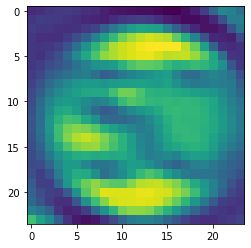

In [6]:
plt.imshow(random.choice(X).reshape(24, 24))

### Trying out different numbers of clusters

In [9]:
data = scale(X)
labels = y
sample_size=300
n_clusters = [5, 10, 15, 20, 30, 40, 50, 75, 100]

estimators = []
silhouette_scores = []

for i in n_clusters:
  estimator = KMeans(init='k-means++', n_clusters=i)
  estimator.fit(data)
  estimators.append(estimator)
  silhouette_scores.append(metrics.silhouette_score(data, estimator.labels_,
                                        metric='euclidean',
                                        sample_size=sample_size))

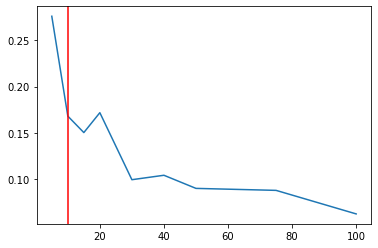

In [10]:
plt.plot(n_clusters, silhouette_scores)
plt.axvline(x=10, color='red')

In [263]:
# Reference: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py

def KMeans_Analysis(X, y):
  data = scale(X)

  n_samples, n_features = data.shape
  n_digits = len(np.unique(y))
  labels = y

  sample_size = 300
  estimators = {}

  print(82 * '_')
  print('init\t\ttime\thomo\tcompl\tv-meas\tsilhouette')

  def bench_k_means(estimator, name, data):
      t0 = time()
      estimator.fit(data)
      print('%-9s\t%.2fs\t%.3f\t%.3f\t%.3f\t%.3f'
            % (name, (time() - t0), 
              metrics.homogeneity_score(labels, estimator.labels_),
              metrics.completeness_score(labels, estimator.labels_),
              metrics.v_measure_score(labels, estimator.labels_),
              metrics.silhouette_score(data, estimator.labels_,
                                        metric='euclidean',
                                        sample_size=sample_size)))
      return estimator

  estimators['k-means++'] = bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
                name="k-means++", data=data)

  estimators['random'] = bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
                name="random", data=data)
  print(82 * '_')

  return estimators

## Selecting Attributes

### No modification

In [275]:
X = X_original.copy()
y = y_original.copy()

In [274]:
estimator_1 = KMeans_Analysis(X, y)

__________________________________________________________________________________
init		time	homo	compl	v-meas	silhouette
k-means++	20.14s	0.122	0.112	0.117	0.141
random   	24.92s	0.122	0.112	0.117	0.139
__________________________________________________________________________________


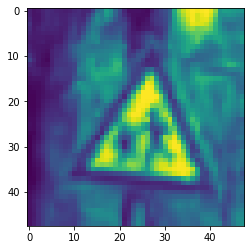

In [276]:
plt.imshow(random.choice(X).reshape(48, 48))

### Selecting only middle 24 * 24 from the image

In [277]:
X = X_original.copy()
y = y_original.copy()

In [278]:
# Selecting only the middle 24 x 24 part of the image 12:36
X = X.reshape(-1, 48, 48)[:, 12:36, 12:36].reshape(-1, 24 * 24)

In [266]:
estimator_2 = KMeans_Analysis(X, y)

__________________________________________________________________________________
init		time	homo	compl	v-meas	silhouette
k-means++	7.46s	0.183	0.164	0.173	0.173
random   	7.49s	0.183	0.164	0.173	0.182
__________________________________________________________________________________


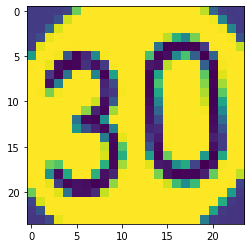

In [280]:
plt.imshow(random.choice(X).reshape(24, 24))

### Now selecting only middle 16 * 16 from the image

In [283]:
X = X_original.copy()
y = y_original.copy()

In [284]:
# Selecting only the middle 16 x 16 part of the image
X = X.reshape(-1, 48, 48)[:, 16:32, 16:32].reshape(-1, 16 * 16)

In [269]:
estimator_3 = KMeans_Analysis(X, y)

__________________________________________________________________________________
init		time	homo	compl	v-meas	silhouette
k-means++	3.92s	0.190	0.168	0.178	0.185
random   	4.00s	0.190	0.168	0.178	0.164
__________________________________________________________________________________


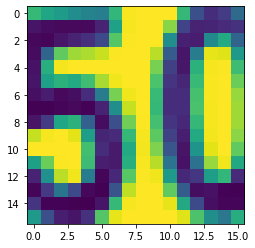

In [285]:
plt.imshow(random.choice(X).reshape(16, 16))

### Now selecting only middle 12 * 12 from the image

In [270]:
X = X_original.copy()
y = y_original.copy()

In [271]:
# Selecting only the middle 12 x 12 part of the image
X = X.reshape(-1, 48, 48)[:, 18:30, 18:30].reshape(-1, 12 * 12)

In [272]:
estimator_4 = KMeans_Analysis(X, y)

__________________________________________________________________________________
init		time	homo	compl	v-meas	silhouette
k-means++	2.41s	0.156	0.140	0.148	0.174
random   	3.88s	0.158	0.141	0.149	0.160
__________________________________________________________________________________


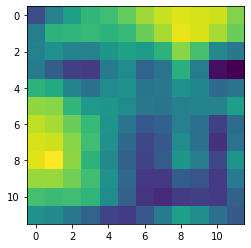

In [252]:
plt.imshow(random.choice(X).reshape(12, 12))